# Deeep Learning

El Deep Learning o aprendizaje profundo es una clase de algoritmos de Machine Learning que utiliza varias capas apiladas de procesamiento para aprender representaciones avanzadas de datos no estructurados. 

## Datos para Deep Learning

Muchos tipos de algoritmos de Machine Learning requieren datos estructurados en forma de tabla como entrada ordenados en columnas de propiedades o características que describen cada observación, por ejemplo, la edad de una persona, sus ingresos y el número de visitas a sitios web el mes pasado son todas propiedades que permiten predecir si la persona se suscribirá a un determinado servicio en línea al mes siguiente. Podríamos usar una tabla estructurada de estas características para entrenar un modelo de regresión logística, un bosque aleatorio o un modelo XGBoost para predecir la variable de respuesta binaria, ¿se suscribió la persona o no se suscribió?

Cada propiedad contiene una información sobre la observación, y el modelo, aprender cómo interactuar estas propiedades para influir en la respuesta. Los datos no estructurados son datos que no están organizados en columnas de propiedades, como las imágenes, el audio y el texto. Por supuesto, una imagen puede tener una estructura espacial, una grabación o un fragmento de texto puede tener la temporal, y los datos de vídeo pueden tener ambos tipos, tanto espacial como temporal.como los datos no llegan en columnas de propiedades, se consideran estructurados.

## Redes neuronales profundas

La mayoria de los sistemas de Deep Learning son redes neuronales artificiales (RNA) con varias capas apiladas ocultas.

### ¿Que es una red neuronal?

Una red neuronal consiste en una serie de capas apiladas. Cada capa contiene unidades que se conectan a las unidades de la capa anterior mediante una serie de pesos.

Las redes neuronales en las que todas las capas adyacentes están totalmente conectadas se denominan *perceptrones multicapa* (MLP, *Multiplayer Perceptron*).

La magia de las redes neuronales profundas reside en encontrar el conjunto de pesos para cada capa que dé como resultado las predicciones más precisas. El proceso de hallar estos pesos es lo que conocemos como entrenar la red.

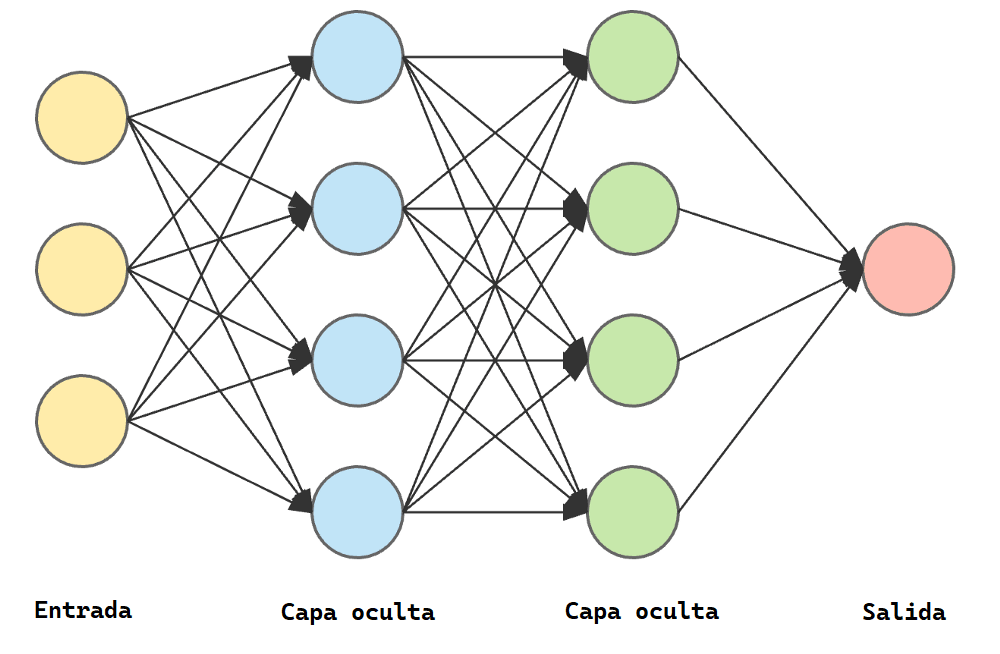

### Aprendiendo sobre las características avanzadas

La cualidad esencial que hace a las redes neuronales tan potentes es su capacidad para aprender caracteristicas o propiedades de los datos de entrada sin indicaciones humanas. Podemos dejar que el modelo decida como quiere organizar sus pesos guiado unicamente por su deseo de minimizar el error en sus predicciones.

Las capas situadas entre la capa de entrada y de salida se denominan capas ocultas. Apilar grandes cantidades de capas permite a la red neuronal aprender progresivamente caracteristicas avanzadas construyendo gradualmente la información a partir de las caracteristicas básicas de capas anteriores.

## TensorFlow y Keras

[TensorFlow](https://www.tensorflow.org/) es una libreria de Python de código abierto para Machine Learning, desarrollada por Google. Es una de las estructuras más utilizadas para crear soluciones de Machine Learning, y pone especial énfasis en la manipulación de tensores. Ofrece la funcionalidad básica necesaria para entrenar redes neuronales como el cálculo del gradiente de expresiones diferenciales arbitrarias y la ejecución eficaz de operaciones tensoriales.

[Keras](https://keras.io/) es una API avanzada para crear redes neuronales construidas sobre *TensorFlow*. Es extremadamente flexible y muy fácil de manejar, lo cual le convierte en una opción ideal para que los inicios con el Deep Learning sean más llevaderos. Es más, nos ofrecen numerosos bloques de construcción de gran utilidad que se pueden conectar unos con otros para crear arquitecturas de Deep Learning muy complejas mediante su API funcional.

## Perceptrón multicapa

A continuación, entrenaremos un perceptor multicapa o MLP para clasificar una imagen dada utilizando aprendizaje supervisado. El aprendizaje supervisado es un tipo de algoritmo de Machine Learning, en el que el ordenador es entrenado con un conjunto de datos etiquetado. En otras palabras, el conjunto de datos empleado para el entrenamiento incluye datos de entrada con las etiquetas de salida correspondientes. El objetivo del algoritmo es aprender la correspondencia entre los datos de entrada y las etiquetas de salida, de manera que pueda realizar predicciones con datos completamente nuevos.

## Preparación de los datos

Para este ejemplo utilizaremos el conjunto de datos CIFAR-10, una colección de 60.000 imágenes en color de 32 x 32 píxeles que viene incluida con Keras. Cada imagen está clasificada exactamente dentro de una de 10 clases. De forma predeterminada los datos de la imagen están formados por enteros entre 0 y 255 por cada canal de píxel. Debemos procesar previamente las imágenes, ajustando estos valores para que estén entre 0 y 1, porque la redes neuronales funcionan mejor cuando el valor absoluto de cada entrada es menor que 1.

También es necesario cambiar el entero que etiqueta las imágenes por vectores de codificación *one-hot*, si la etiqueta entera de clase de una imagen es i, entonces su codificación *one-hot* es un vector de longitud 10 con 0 en todos sus elementos, excepto el i-ésimo que es 1.

In [2]:
import numpy as np
import tensorflow as tf

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
NUM_CLASSES = 10

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

y_train = tf.keras.utils.to_categorical(y_train, NUM_CLASSES)
y_test = tf.keras.utils.to_categorical(y_test, NUM_CLASSES)

170498071/170498071 [==============================] - 11s 0us/step


## Creación del modelo

En Keras se puede definir la estructura de una red neuronal como modelo `Sequential` o bien utilizar la API funcional. Un modelo `Sequential` es útil para definir rápidamente una pila de capas lineal (es decir, donde una capa va directamente después de la anterior sin ramificaciones). Podemos definir nuestro modelo MLP utilizando la clase `Sequential`.

A continuación, se muestra la creación de nuestro MLP utilizando un `Sequential`:

In [4]:
from tensorflow.keras import layers, models

model = models.Sequential()
model.add(layers.Flatten(input_shape=(32,32,3)))
model.add(layers.Dense(200, activation='relu'))
model.add(layers.Dense(150, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

Muchos de los modelos requieren que la salida de una capa se pase varias capas posteriores o, a la inversa, que una capa reciba entrada de varias capas anteriores. Para estos modelos, la clase `Sequential` no es adecuada, por lo que tendríamos que usar en su lugar, la API funcional, que es mucho más flexible.

A continuación, se muestra un ejemplo de creación de nuestro MLP con la API funcional:

In [3]:
from tensorflow.keras import layers, models

input_layer = layers.Input(shape=(32,32,3))

x=layers.Flatten()(input_layer)
x=layers.Dense(units=200, activation='relu')(x)
x=layers.Dense(units=150, activation='relu')(x)

output_layer = layers.Dense(units=10, activation='softmax')(x)

model = models.Model(input_layer, output_layer)

Ambos métodos produce modelos idénticos, veamos con más detalles, las distintas capas y funciones de activación empleadas dentro del MLP.

### Capas

Para crear nuestro MLP, usamos tres tipos de capas: `Input`, `Flatten` y `Dense`. La capa `Input` es un punto de entrada a la red. Le indicamos a la red la forma de cada elemento de datos para que lo espere como una tupla. No especificamos el tamaño del lote; no es necesario, puesto que podemos pasarle cualquier número de imágenes a la capa `Input` simultáneamente, no necesitamos afirmar de manera explícita el tamaño del lote en la definición de la capa `Input`.

Después, aplanamos esta entrada para darle forma de vector usando la capa `Flatten`, lo que da como resultado un vector de longitud 3072 (32 x 32 x 3). La razón por la que hacemos esto es que la capa `Dense` subsiguiente requiere que su entrada sea plana, en lugar de un array multidimensional. Como veremos más tarde, otros tipos de capa requieren arrays multidimensionales como entrada, de forma que es necesario con la forma requerida de la entrada y salida de cada tipo de capa para entender cuándo es necesario usar `Flatten`.

La capa `Dense` es uno de los bloques de construcción fundamentales de una red neuronal. Contiene un determinado número de unidades que están densamente conectadas a la capa anterior. Es decir, cada unidad de la capa está conectada a cada unidad de la capa anterior, mediante una única conexión que lleva un peso. La salida de una determinada unidad es la suma ponderada de las entradas que recibe de la capa anterior, que después se pasa a través de una función activación no lineal antes de ser enviada a la capa siguiente. La función de activación es crítica para asegurar que la red neuronal sea capaz de aprender funciones complejas y no solo tener una combinación lineal de sus entradas.